In this notebook we analyse the census microdata. This gives the anonamyzed data for a small sample of individuals.

In [2]:
import os
import pathlib
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

The census microdata gives us data for a small sample of individuals.

The data can be downloaded from https://www.ons.gov.uk/census/2011census/2011censusdata/censusmicrodata/microdatateachingfile.

Load the data.

In [7]:
root = pathlib.Path("data") 
df = pd.read_csv(root / "2011 Census Microdata Teaching File.csv", skiprows=1)
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


Each person can be uniquely identified but their `Person ID`.

Plot the distribution of sexes at each age.

<Axes: xlabel='Age', ylabel='count'>

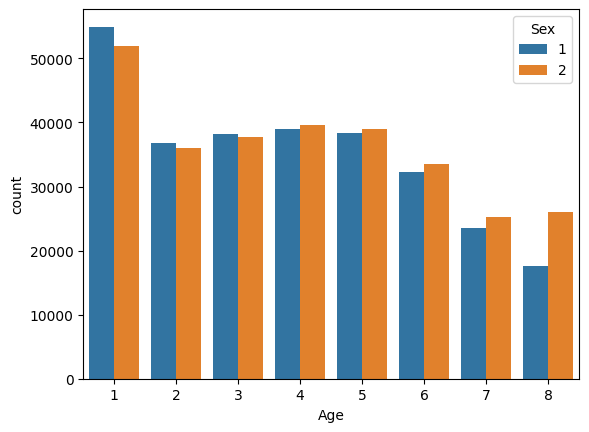

In [8]:
sns.countplot(df, x="Age", hue="Sex")

Plot the number of individuals for each region.

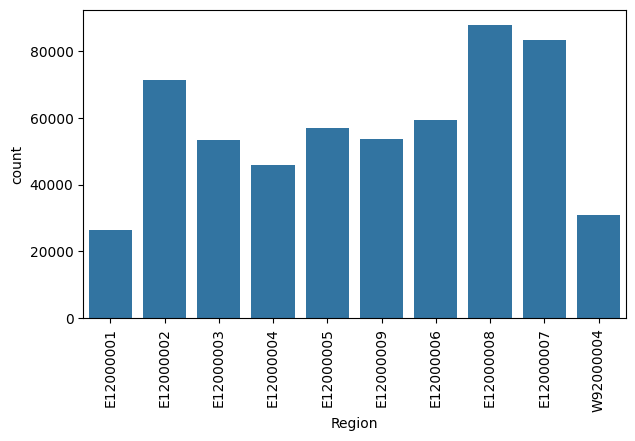

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.countplot(df, x="Region", ax=ax, color="tab:blue")
ax.tick_params(axis="x", rotation=90)

Can you find which region is associated with each region code?

Find the number of individuals at each age and health combination.

In [68]:
age_health_count = (
    df.loc[df["Health"] != -9]
    .groupby(["Health", "Age"])
    .size()
    .reset_index()
    .rename(columns={0: "Count"})
    .pivot(index="Health", columns="Age", values="Count")
)
age_health_count.head()

Age,1,2,3,4,5,6,7,8
Health,,,,,,,,
1,83580,43701,42591,37417,28963,17261,8185,3273
2,19167,19821,27193,30902,32573,28263,20585,13240
3,2360,2986,4554,7373,10818,13716,14225,18448
4,513,535,1137,2320,3900,5035,4485,6633
5,194,170,288,615,1126,1387,1297,2107


<Axes: xlabel='Age', ylabel='Health'>

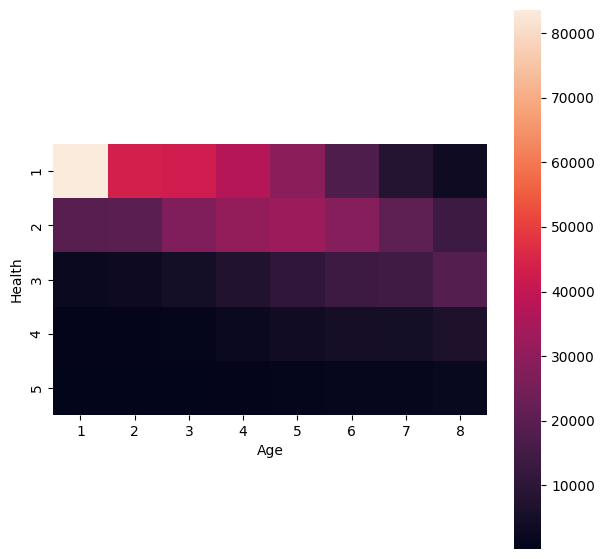

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.heatmap(age_health_count, square=True)

The brighter the colour, the more individuals. As age increases, the number of individuals with a health score of 1 decreases.

What percentage of individuals with an age of 8 have a health score of 1?